In [37]:
#Projet Speed Dating
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset_raw = pd.read_csv('data/Speed Dating Data.csv', delimiter= ',', encoding='ISO-8859-1')

## 1. First look at the data
Source : https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment <br>
Data gathered by Columbia Business School professors, from participants in experimental speed dating events from 2002-2004.
Speed Dating results and matches between (heterosexual) participants.

In [38]:
pd.set_option('display.max_columns', None)
dataset_raw.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [39]:
dataset_raw.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [40]:
display('There are {} unique participants'.format(dataset_raw.iid.nunique()))
# Out of 8378 entries

'There are 551 unique participants'

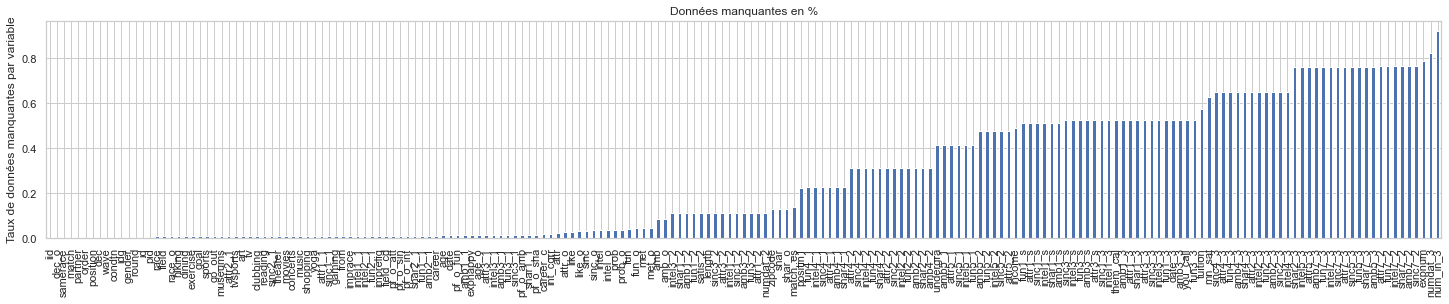

In [41]:
# Large amount of data missing on some characteristics, most because of dependency on other data, some without context.
dataset_raw.isna().mean().sort_values().plot(kind="bar", figsize=(25, 4),
            title="Données manquantes en %", ylabel="Taux de données manquantes par variable")
plt.show()

In [57]:
dataset_raw.iid.value_counts().mean()

15.20508166969147

There are 551 individuals, participating in 15.2 speed dates on average (number of participants varied between waves).

## 2. Cleaning up and determining focus
Data regarding the self-evaluated importance of attributes is both subjective and unreliable because of missing data.<br>
I will focus on objective data (gender, race, age...), decisions (match or not, second date...) and some subjective data directly related to decisions (evaluation of partner). <br>
All mentions of men or women in this notebook should be read as men & women "in this sample" and do not imply that the same dynamics apply to the entire human population.

In [58]:
dataset = dataset_raw.copy()
# Mapping categorical values in new dataset
dataset['gender'] = dataset.gender.map({1 : 'Male', 0 : 'Female'}).fillna(dataset.gender)
dataset['race'] = dataset.race.map({1: 'Black/African American', 2: 'European/Caucasian-American', 3: 'Latino/Hispanic American', 
                          4: 'Asian/Pacific Islander/Asian-American', 5: 'Native American', 6: 'Other'}).fillna(dataset.race)
dataset['race_o'] = dataset.race_o.map({1: 'Black/African American', 2: 'European/Caucasian-American', 3: 'Latino/Hispanic American', 
                          4: 'Asian/Pacific Islander/Asian-American', 5: 'Native American', 6: 'Other'}).fillna(dataset.race_o)
dataset['match'] = dataset.match.map({1 : 'Yes', 0 : 'No'}).fillna(dataset.match)
dataset.date_3.fillna(0,inplace=True)
# Dealing with missing values in date_3
dataset.date_3.fillna(0,inplace=True)
dataset['date_3'] = dataset.date_3.map({1 : 'Yes', 0 : 'No'}).fillna(dataset.date_3)
dataset['dec_o'] = dataset.dec_o.map({1 : 'Yes', 0 : 'No'}).fillna(dataset.dec_o)
dataset['dec'] = dataset.dec.map({1 : 'Yes', 0 : 'No'}).fillna(dataset.dec)


Male      277
Female    274
Name: gender, dtype: int64

age                         
             mean median   min   max count
gender                                    
Female  26.126394   26.0  19.0  55.0   269
Male    26.587591   27.0  18.0  42.0   274

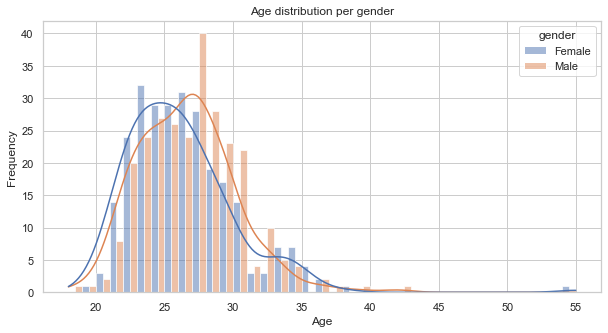

In [44]:
dataset_unique = dataset.drop_duplicates(subset=['iid'], keep="first").copy()
# Dataset with 1 entry per individual
display(dataset_unique.gender.value_counts(dropna=False))
display(dataset_unique[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count']))

plt.figure(figsize=(10,5))
sns.set(style="whitegrid", color_codes=True)
sns.histplot(data=dataset_unique, x='age', hue='gender', multiple="dodge", kde=True, binwidth=1
            ).set(title = 'Age distribution per gender' , xlabel='Age', ylabel='Frequency')
plt.show()
# Male population slightly older than female on average

European/Caucasian-American              304
Asian/Pacific Islander/Asian-American    136
Latino/Hispanic American                  42
Other                                     37
Black/African American                    26
NaN                                        6
Name: race, dtype: int64

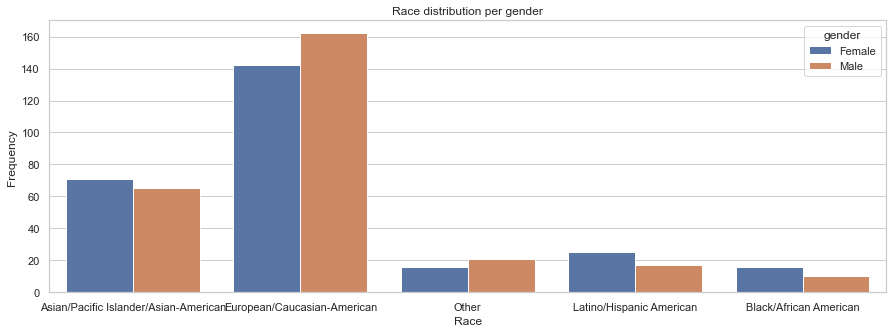

In [45]:
display(dataset_unique.race.value_counts(dropna=False))
plt.figure(figsize=(15,5))
sns.countplot(x='race', data=dataset_unique, hue='gender'
            ).set(title = 'Race distribution per gender' , xlabel='Race', ylabel='Frequency')
plt.show()

Participants are for the most part (88%) between 20 and 30 years old, as expected from a sample of students. The male population is slightly older (by less than half a year).<br>
They are predominantly European/Caucasian-American (55%), then Asian/Pacific Islander/Asian-American (25%), followed by several minorities including unspecified "Other".<br>
This distribution (and low numbers for minorities) makes it unlikely to produce reliable comparisons in potential race dynamics.

## 3. Exploring results

### 3a. Attributes

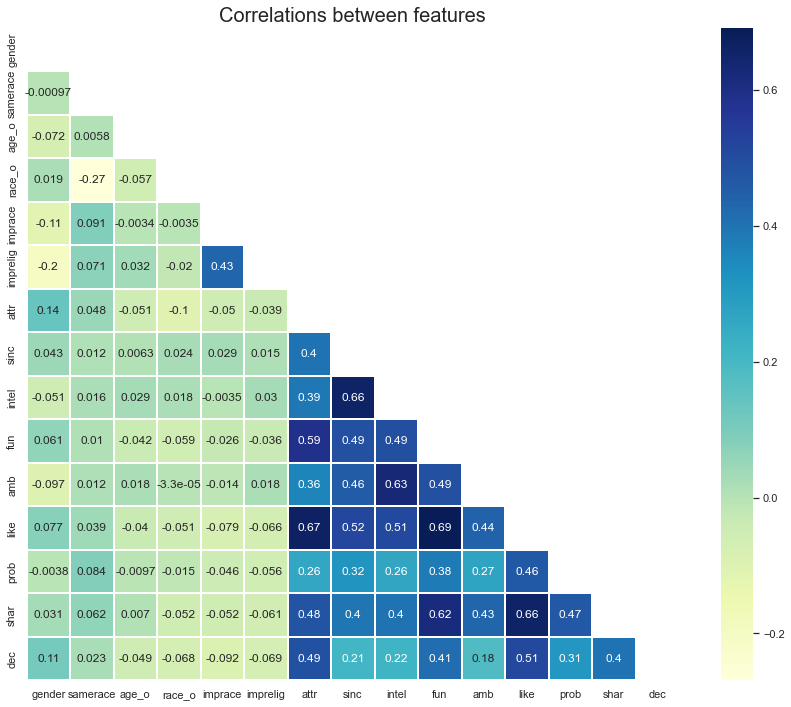

In [46]:
corr_columns = [
'gender', 'samerace', 'age_o', 'race_o', 'imprace', 'imprelig',
'attr', 'sinc', 'intel', 'fun', 'amb', 'like', 'prob', 'shar', 'dec'
]
data_corr = dataset_raw[corr_columns]

mask = np.zeros_like(data_corr.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap (data_corr.corr(), annot=True, mask = mask,
             cmap = 'YlGnBu', linewidths=0.1, square=True)
plt.title("Correlations between features", fontsize=20);

Some outstanding correlations : <br>
Importance of race & importance of religion go hand in hand, but don't matter much for decisional purposes.<br>
Personal attributes are correlated with each other quite a lot, with fun, attractiveness and shared interests being most important but not always generating a positive decision.<br>

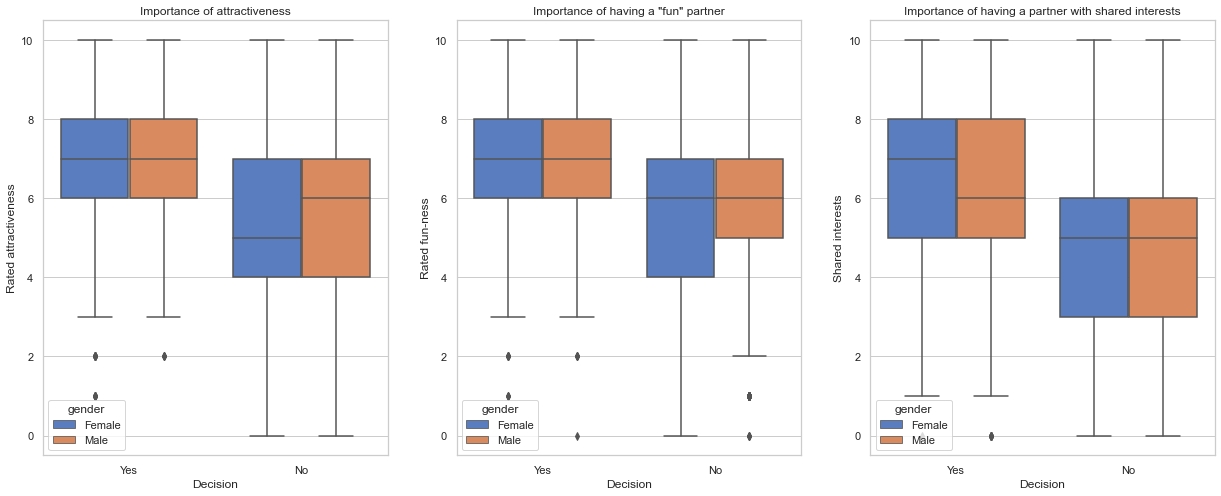

In [47]:
fig, axs = plt.subplots(ncols=3, figsize=(21,8))

# looking at acceptance/rejection by attractiveness attribute
sns.boxplot(x='dec', y='attr', data=dataset, palette='muted',hue='gender',ax=axs[0]
            ).set(title='Importance of attractiveness', xlabel='Decision', ylabel='Rated attractiveness')
# looking at acceptance/rejection by fun attribute
sns.boxplot(x='dec', y='fun', data=dataset, palette='muted',hue='gender',ax=axs[1]
            ).set(title='Importance of having a "fun" partner', xlabel='Decision', ylabel='Rated fun-ness')
# looking at acceptance/rejection by shared interests attribute            
sns.boxplot(x='dec', y='shar', data=dataset, palette='muted',hue='gender',ax=axs[2]
            ).set(title='Importance of having a partner with shared interests', xlabel='Decision',ylabel='Shared interests')
plt.show()

Attractiveness, fun & shared interests are at the top of the list but are not a guarantee for success !<br>
There are surprising outliers on the lower end of the spectrum of important attributes that nevertheless "made the cut".

### 3b. Pressure & Expectations

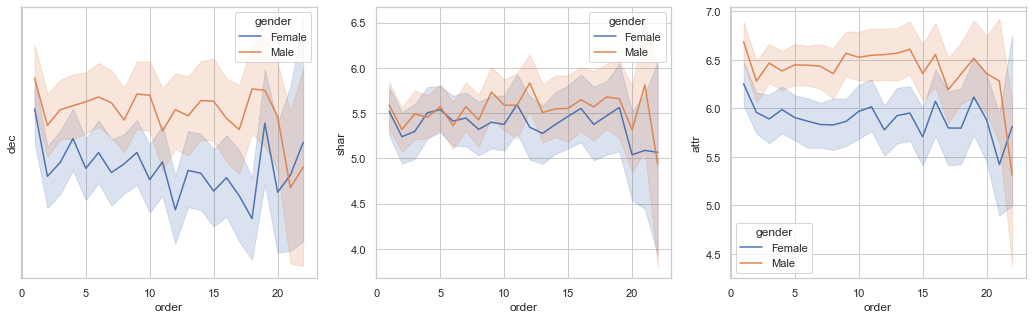

In [48]:
fig, axs = plt.subplots(ncols=3, figsize=(18,5))

sns.lineplot(x="order", y="dec", hue="gender", data=dataset,ax=axs[0])
sns.lineplot(x="order", y="shar", hue="gender", data=dataset,ax=axs[1])
sns.lineplot(x="order", y="attr", hue="gender", data=dataset,ax=axs[2])
plt.show()

Men and women follow a similar pattern of decision as the evening progresses, though women are harsher judges. <br>
Evaluations drop during the event : Is it fine-tuning or weariness ?

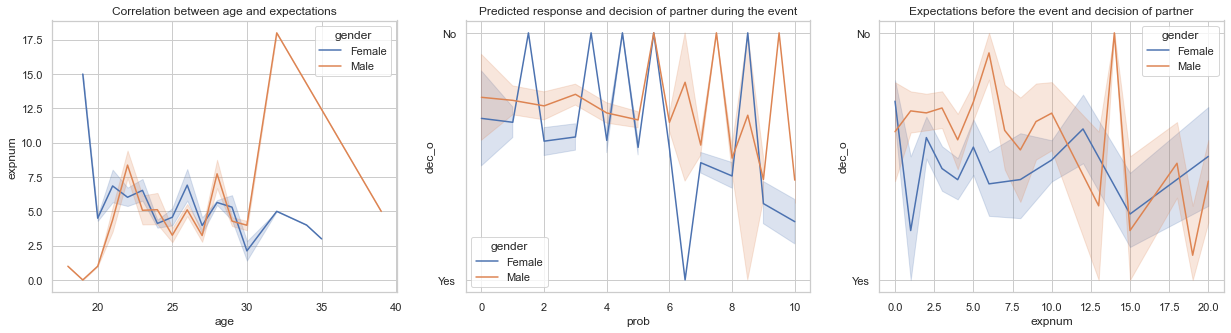

In [49]:
fig, axs = plt.subplots(ncols=3, figsize=(21,5))

sns.lineplot(x = 'age' , y = 'expnum' , data = dataset, hue = 'gender',ax=axs[0]).set(title='Correlation between age and expectations')
sns.lineplot(x="expnum", y="dec_o", hue="gender", data=dataset,ax=axs[2]).set(title='Expectations before the event and decision of partner')
sns.lineplot(x="prob", y="dec_o", hue="gender", data=dataset,ax=axs[1]).set(title='Predicted response and decision of partner during the event')

plt.show()

Expectations may be related to age... This is an interesting dynamic of younger women being more confident than men and the opposite as both get older, but really we would need more data. Men and women before 20 and after 30 are not well represented in our sample.<br>
Confidence leads to a small ability to predict positive outcome, though not consistently reliable. Some high values still miss the mark.

### 3c. Decisions

dec_o,No,Yes
gender,,
Female,2198,1986
Male,2665,1529


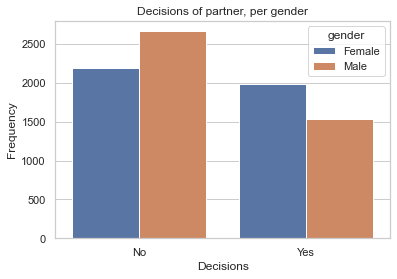

In [50]:
display(pd.crosstab(index=dataset.gender, columns=dataset.dec_o))
# Answer to "Would you like to see him again".
sns.countplot(x='dec_o', hue='gender', data=dataset
            ).set(title = 'Decisions of partner, per gender' , xlabel='Decisions', ylabel='Frequency')
plt.show()

'Only 16.47% chance of a match'

match,No,Yes
gender,,
Female,3494,690
Male,3504,690


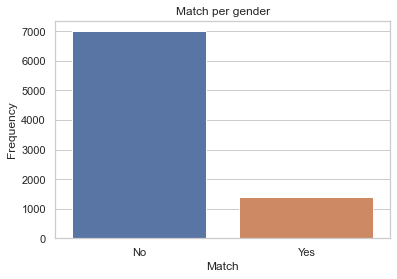

In [51]:
# Number of actual matches
cross_match = pd.crosstab(index=dataset['match'],columns="count")
date_match = int(cross_match.iloc[1])/(int(cross_match.iloc[1])+int(cross_match.iloc[0]))*100

sns.countplot(x='match', data=dataset
            ).set(title = 'Match per gender' , xlabel='Match', ylabel='Frequency')
pd.crosstab(index=dataset.gender, columns=dataset.match)

display(f"Only {date_match:.2f}% chance of a match")
display(pd.crosstab(index=dataset.gender, columns=dataset.match))

Men are more likely to be rejected by women than women rejected by men.

In [52]:
# Count for 1 partner saying yes but no match
no_match = len(dataset_raw[(dataset_raw['dec_o']==0) & (dataset_raw['dec']==1)]) 
+ len(dataset_raw[(dataset_raw['dec_o']==1) & (dataset_raw['dec']==0)])
disappointed_ratio = no_match / len(dataset_raw.index)
display(f"{(disappointed_ratio*100):.2f}% said yes but didn't match !")
# The majority are men, since women were more selective
rejection_count = dataset['gender'].loc[dataset['dec'] == 'Yes'][dataset['dec_o']=='No'].value_counts()
display(f"Men were rejected {(rejection_count[0])} times and women {rejection_count[1]} times")

"25.52% said yes but didn't match !"

'Men were rejected 1299 times and women 839 times'

25.52% were likely disappointed after saying "yes" to someone who didn't like them back : Men were more often rejected out of a desired match, with 1299 instances and 839 for women (out of a total for both sexes of 8378 speed dates).

In [53]:
cross_2nd_date = pd.crosstab(index=dataset['date_3'],columns="count")
calc_2nd_date = int(cross_2nd_date.iloc[1])/(int(cross_2nd_date.iloc[1])+int(cross_2nd_date.iloc[0]))*100
# Still only 37.7% chance of a 2nd date even after a match
display(f"Only {calc_2nd_date:.2f}% chance of a second date")
# Higher numbers of actual 2nd dates than matches
# Females have more success
pd.crosstab(index=dataset['date_3'],columns="count")

'Only 17.88% chance of a second date'

col_0,count
date_3,
No,6880
Yes,1498


16.47% chance of a match and 17.88% chance of a second date ? That's a little strange...

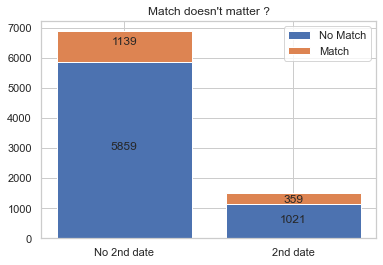

In [54]:
# Match doesn't matter much ?
all_2nd_dates= dataset_raw.date_3.groupby(dataset.match).value_counts()
Second_date_match = dataset.date_3[dataset['match']=='No'].value_counts()
Second_date_nomatch = dataset.date_3[dataset['match']=='Yes'].value_counts()
labels_2nd_date = 'No 2nd date','2nd date'

plt.title("Match doesn't matter ?")
plt.bar(labels_2nd_date,Second_date_match)
plt.bar(labels_2nd_date,Second_date_nomatch, bottom = Second_date_match)
plt.legend(['No Match', 'Match'])
plt.text(0,all_2nd_dates[0]+(all_2nd_dates[1]/2), all_2nd_dates[1], horizontalalignment='center')
plt.text(1,all_2nd_dates[2]+(all_2nd_dates[3]/2), all_2nd_dates[3], horizontalalignment='center')
plt.text(0,(all_2nd_dates[0]/2), all_2nd_dates[0], horizontalalignment='center')
plt.text(1,(all_2nd_dates[2]/2), all_2nd_dates[2], horizontalalignment='center')
plt.show()

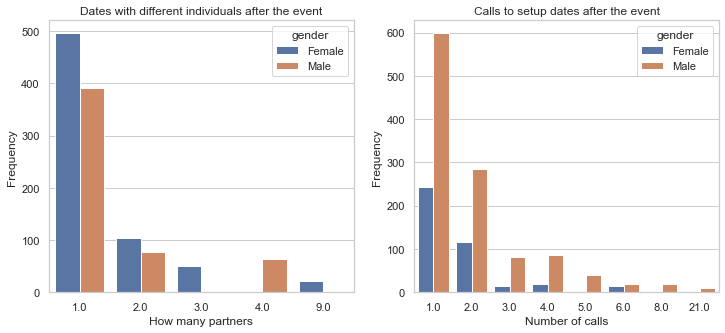

In [55]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.countplot(x='numdat_3', hue='gender',data=dataset[dataset['numdat_3']>0], ax=axs[0]
            ).set(title = 'Dates with different individuals after the event' , xlabel='How many partners', ylabel='Frequency')
sns.countplot(x='you_call', hue='gender',data=dataset[dataset['you_call']>0], ax=axs[1]
            ).set(title = 'Calls to setup dates after the event' , xlabel='Number of calls', ylabel='Frequency')
plt.show()

# Most focus on 1 partner for a 2nd date, but for some the search hasn't ended !

Participants stand a 17.88% chance of getting a second date, for each interaction in the event.<br>
Having a match (16.47% for each interaction) improves this chance to just 26.01%, while no match still gives a 16.27% chance of a second date.<br>
Being persistent is not fruitless ! Participants did not rely much on the results of the event to plan their dates.<br>

Most pursued only one individual for a second date after the event, which may indicate success. On the other hand, a few made numerous attempts to find "the one" several times: <br>
As many as 9 dates with different partners for some women... And calls to 21 different women for some men !<br>
Men were overwhelmingly more insistent in that regard.
